In [1]:
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import requests
import json
import pandas as pd

# 민원정보분석조회 서비스 
## 1. 급증 키워드 정보

In [2]:
#   url for request
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minRisingKeyword2'

In [3]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("scoreMode"): "rising", # 오늘의 키워드: rising, 급증 키워드: risingSudden
    quote_plus("analysisTime"): "20201001",
    quote_plus("maxResult"): "25", # 결과로 반환될 최대 Term의 개수
    quote_plus("target"): "pttn,saeol,dfpt", # 인덱스 타입
    
    # 이하 조건들은 한번에 한 개씩만 조회하기
    #quote_plus("mainSubCode"): "6110000",
    quote_plus("brtcNameAKeyword"): urllib.parse.quote("경기도/남양주시"), #지역별 민원
    #quote_plus("classificationMulti") : "도시/도시계획",  #분야
   # quote_plus("sex"): "108",
    #quote_plus("age"): "500",
    
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))
#req.encoding = 'utf-8' 

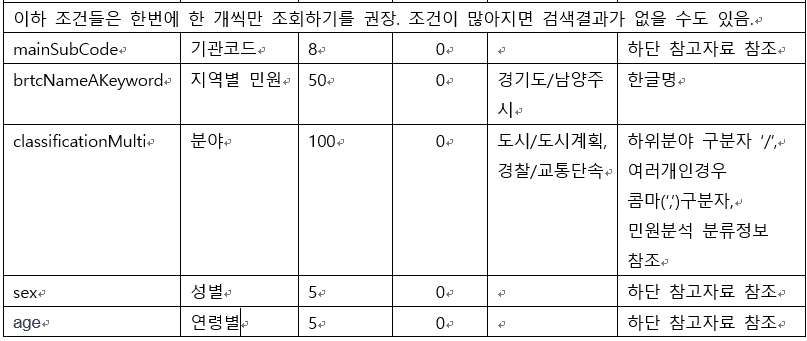
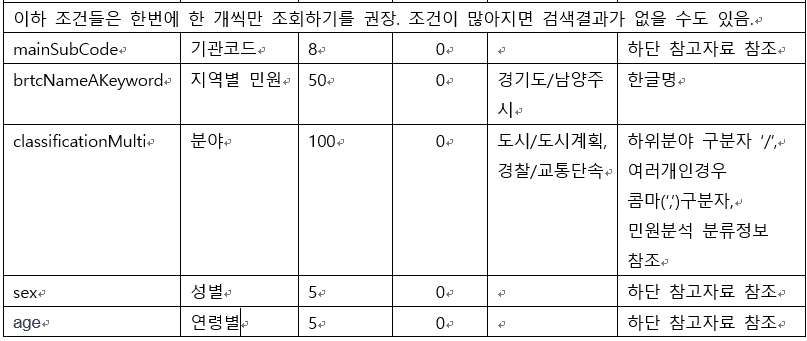
> 민원 기관 코드: https://www.code.go.kr

In [4]:
#req = urllib.request.Request('http://apis.data.go.kr/1140100/minAnalsInfoView2/minRisingKeyword2?serviceKey=Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D&scoreMode=rising&analysisTime=20191105&maxResult=100&target=pttn,dfpt,saeol')

In [5]:
url + unquote(params)

'http://apis.data.go.kr/1140100/minAnalsInfoView2/minRisingKeyword2?dataType=json&scoreMode=rising&analysisTime=20201001&maxResult=25&target=pttn,saeol,dfpt&brtcNameAKeyword=%EA%B2%BD%EA%B8%B0%EB%8F%84/%EB%82%A8%EC%96%91%EC%A3%BC%EC%8B%9C&serviceKey=Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D'

In [6]:
url + urllib.parse.quote(params)

'http://apis.data.go.kr/1140100/minAnalsInfoView2/minRisingKeyword2%3FdataType%3Djson%26scoreMode%3Drising%26analysisTime%3D20201001%26maxResult%3D25%26target%3Dpttn%252Csaeol%252Cdfpt%26brtcNameAKeyword%3D%2525EA%2525B2%2525BD%2525EA%2525B8%2525B0%2525EB%25258F%252584%252F%2525EB%252582%2525A8%2525EC%252596%252591%2525EC%2525A3%2525BC%2525EC%25258B%25259C%26serviceKey%3DUse0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%25252BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%25253D%25253D'

In [7]:
# 의존성 추가
import ssl
context = ssl._create_unverified_context()

In [8]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

{'returnObject': [{'date': '20200930', 'keyword': '경기도_남양주시', 'df': 141, 'rank': 1, 'prevRatio': '354.84', 'prevDf': 31}, {'date': '20200930', 'keyword': 'M버스_노선', 'df': 47, 'rank': 2, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '광역급행버스_노선', 'df': 47, 'rank': 3, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '광역급행버스_이용', 'df': 47, 'rank': 4, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '광역급행버스_정류장', 'df': 47, 'rank': 5, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '노선_계획', 'df': 47, 'rank': 6, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '노선_운영', 'df': 47, 'rank': 7, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '두산_알프하임', 'df': 47, 'rank': 8, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '배차_운영', 'df': 47, 'rank': 9, 'prevRatio': '4600.00', 'prevDf': 1}, {'date': '20200930', 'keyword': '백봉지구_두산알프하임', 'df': 47, 'rank

In [9]:
data_values = data.values()
type(data_values)
#data_values['date']

dict_values

In [10]:
list(data_values)[0][0]

{'date': '20200930',
 'keyword': '경기도_남양주시',
 'df': 141,
 'rank': 1,
 'prevRatio': '354.84',
 'prevDf': 31}

In [11]:
data_values2 = list(data_values)[0]

In [12]:
len(data_values2)

25

In [13]:
data_values2[0]['date']

'20200930'

In [14]:
data_df = pd.DataFrame(data_values2, index = range(25))

In [15]:
data_df

,date,keyword,df,rank,prevRatio,prevDf
0,20200930,경기도_남양주시,141,1,354.84,31
1,20200930,M버스_노선,47,2,4600.00,1
2,20200930,광역급행버스_노선,47,3,4600.00,1
3,20200930,광역급행버스_이용,47,4,4600.00,1
4,20200930,광역급행버스_정류장,47,5,4600.00,1
5,20200930,노선_계획,47,6,4600.00,1
6,20200930,노선_운영,47,7,4600.00,1
7,20200930,두산_알프하임,47,8,4600.00,1
8,20200930,배차_운영,47,9,4600.00,1
9,20200930,백봉지구_두산알프하임,47,10,4600.00,1


In [17]:
"""for i in range(len(data_values)):
    data_values2[0]['date']
    data[1]['keyword']
    data[2]['df']
    data[3]['rank']
    data[4]['prevRatio']
    data[5]['prevDf']
    res = pd.DataFrame(data[3])"""

"for i in range(len(data_values)):\n    data_values2[0]['date']\n    data[1]['keyword']\n    data[2]['df']\n    data[3]['rank']\n    data[4]['prevRatio']\n    data[5]['prevDf']\n    res = pd.DataFrame(data[3])"

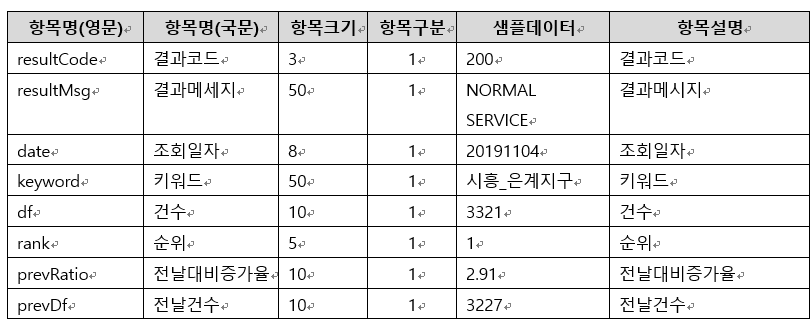


- 일단 보류하고 다음 껄로

## 2. TOP 키워드 정보
시작일자, 종료일자, 기관코드 등의 조건으로 가장 많이 나타난 키워드를 조회할 수 있는 정보

In [18]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minTopNKeyword2'

In [45]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("resultCount"): "30", # 결과수
    quote_plus("searchCount"): "1000", # 분석 대상 문서 수
    #quote_plus("searchword"): "", # 검색 질의어
    quote_plus("target"): "pttn,saeol,dfpt", # 인덱스 타입
    quote_plus("depCode"): "3130000", # 부서코드
    #quote_plus("depCodePath"): "0000000/6480000/5380000", 
    quote_plus("dateFrom") : "20191001",  #검색기간(시작일)
    quote_plus("dateTo"): "20191030", # 검색기간(종료일)
    
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

In [46]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[{'label': '진열대', 'value': '6.0'}, {'label': '마포구', 'value': '4.0'}, {'label': '서울특별시 마포구', 'value': '4.0'}, {'label': '식품제조업', 'value': '4.0'}, {'label': '옆차', 'value': '4.0'}, {'label': '전화번호', 'value': '4.0'}, {'label': '주차장', 'value': '4.0'}, {'label': '회사앞', 'value': '4.0'}, {'label': '휴계음식점 매장', 'value': '4.0'}, {'label': '가공업', 'value': '2.0'}, {'label': '개별 포장', 'value': '2.0'}, {'label': '구청 담당 위생과', 'value': '2.0'}, {'label': '디저트 카페', 'value': '2.0'}, {'label': '매장 판매', 'value': '2.0'}, {'label': '서울', 'value': '2.0'}, {'label': '성분 표시', 'value': '2.0'}, {'label': '성산동', 'value': '2.0'}, {'label': '영업신고', 'value': '2.0'}, {'label': '위생과', 'value': '2.0'}, {'label': '유통기한', 'value': '2.0'}, {'label': '음식점', 'value': '2.0'}, {'label': '자가품질검사', 'value': '2.0'}, {'label': '점업', 'value': '2.0'}, {'label': '즉석판매제조가공업', 'value': '2.0'}]


In [49]:
data_df2 = pd.DataFrame(data, index = range(len(data)))

In [50]:
data_df2

,label,value
0,진열대,6.0
1,마포구,4.0
2,서울특별시 마포구,4.0
3,식품제조업,4.0
4,옆차,4.0
5,전화번호,4.0
6,주차장,4.0
7,회사앞,4.0
8,휴계음식점 매장,4.0
9,가공업,2.0


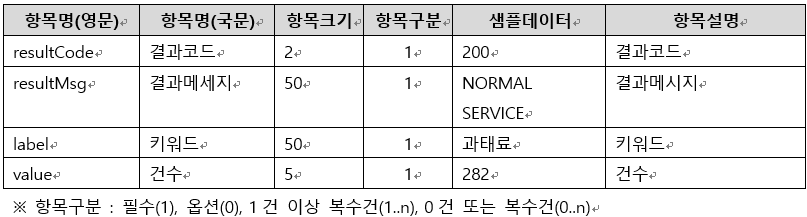


> 모든 지자체에 대한 기관코드가 필요

마포구: 3130000

* 기간설정을 어떻게 할지 결정 필요 (월 별로 50이상의 건수가 나온 키워드만 올 해의 키워드로 두기 등)

## 3. 민원분석 분류체계 정보
민원을 동일한 분야로 분류하기 위해 대분류, 중분류, 소분류로 구분하는 분류체계 정보

In [51]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minClfcInfo2'

In [53]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    #quote_plus("searchCatName"): "경찰", # 분류명
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

In [54]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[{'fullPath': '경찰'}, {'fullPath': '경찰>경찰 교통'}, {'fullPath': '경찰>경찰 교통>교통사고 조사·재조사'}, {'fullPath': '경찰>경찰 교통>교통시설'}, {'fullPath': '경찰>경찰 교통>운전면허'}, {'fullPath': '경찰>경찰 행정'}, {'fullPath': '경찰>교통 단속'}, {'fullPath': '경찰>교통 단속>기타 교통단속'}, {'fullPath': '경찰>교통 단속>불법주정차'}, {'fullPath': '경찰>교통 단속>자동차관리'}, {'fullPath': '경찰>사이버 범죄'}, {'fullPath': '경찰>수사'}, {'fullPath': '경찰>수사>수사 절차 미준수'}, {'fullPath': '경찰>수사>편파수사 및 부당 수사행태'}, {'fullPath': '경찰>치안 및 방범'}, {'fullPath': '과학기술'}, {'fullPath': '과학기술>연구개발'}, {'fullPath': '과학기술>연구개발>과학기술분야 개발지원'}, {'fullPath': '과학기술>연구개발>미래인재'}, {'fullPath': '과학기술>정보통신'}, {'fullPath': '과학기술>정보통신>유무선전화'}, {'fullPath': '과학기술>정보통신>인터넷'}, {'fullPath': '과학기술>정보통신>정보통신사용료'}, {'fullPath': '과학기술>통신정책'}, {'fullPath': '과학기술>통신정책>전파'}, {'fullPath': '과학기술>통신정책>통신비밀'}, {'fullPath': '과학기술>통신정책>통신사업'}, {'fullPath': '관광'}, {'fullPath': '관광>관광산업'}, {'fullPath': '관광>관광산업>관광산업 개발·육성'}, {'fullPath': '관광>관광산업>관광지 개발·육성'}, {'fullPath': '관광>관광정책'}, {'fullPath': '관광>관광정책>관광 진흥'}, {'fullPath': '관

In [56]:
data_df3 = pd.DataFrame(data, index = range(len(data)))

In [59]:
dt3 = []
for i in range(len(data)):
    if '>' not in data_df3.iloc[i,0]:
        dt3.append(data_df3.iloc[i,0])

In [60]:
dt3

['경찰',
 '과학기술',
 '관광',
 '교육',
 '교통',
 '국방',
 '노동',
 '농림·축산',
 '도로',
 '도시',
 '문화',
 '방송통신',
 '법무',
 '보건',
 '복지',
 '사법',
 '산업·통상',
 '세무',
 '수자원',
 '외무통일',
 '우정',
 '재정',
 '주택·건축',
 '체육',
 '해양수산',
 '행정·안전',
 '환경']

- 세부사업별 분류와 매칭필요

## 4. 맞춤형통계 정보
시작일자, 종료일자, 기관코드, 부서코드, 분야, 성별, 연령 등의 다양한 조건으로 조회할 수 있는 민원 건 수 통계 정보

In [364]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minStaticsInfo2'

In [369]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("period"): "YEARLY", # 분석주기(DAILY, YEARLY, MONTHLY)
    quote_plus("sortBy"): "NAME", # 정렬 대상(NAME, VALUE)
    quote_plus("sortOrder"): "false", #정렬 조건(true, false)
    quote_plus("topN"): "10000", # 가져올 상위 건수
    quote_plus("target"): "pttn,dfpt,saeol",
    quote_plus("dateFrom"): "20100101",
    quote_plus("dateTo"): "20201031",
   # quote_plus("searchword"): "", # 검색 질의어
    #quote_plus("depCode"): "3130000", # 부서코드
    #quote_plus("depCodePath"): "0000000/6480000/5380000", 
    #quote_plus("mainSubCode"): "MONTHLY", # 기관코드
    #quote_plus("classificationMulti"): urllib.parse.quote("도시/도시계획, 경찰/교통단속"),
    quote_plus("brtcNameAKeyword"): urllib.parse.quote("서울특별시/마포구"), #지역별 민원
   # quote_plus("sex"): "108",
    #quote_plus("age"): "500",
    
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

|항목명(영문)|	항목명(국문)|	항목크기|	항목구분|	샘플데이터|	항목설명|
|----------------|--------------------|----|----|-----------|-------------------------------------|
|serviceKey|	인증키|	100|	1|	인증키(URL Encode)	|공공데이터포털에서 발급받은 인증키|
|period|	분석 주기|	8|	1|	DAILY|	DAILY : 일별, MONTHLY : 월별, YEARLY : 년별|
|sortBy|	정렬 대상|	5|	1|	NAME|	NAME, VALUE|
|sortOrder|	정렬 조건|	6|	1|	false|	true, false|
|topN|	가져올 상위 건수|	10|	1|	10000|  |	
|target|	인덱스타입|	7|	1|	pttn,dfpt,saeol|	하단 참고자료 참조|
|dateFrom|	검색기간(시작일)|	10|	0|	20180101000000	|yyyyMMdd만 작성할 시 000000자동으로 셋팅됨, 특정시간을 지정할때는 yyyyMMddHHmmss로 14자리를 작성해서 요청할 수 있음.|
|dateTo|	검색기간(종료일)|	10|	0|	20180107235959|	yyyyMMdd만 작성시 현재시간으로 시분초가 셋팅됨, 특정시간을 지정할때는 yyyyMMddHHmmss로 14자리를 작성해서 요청할 수 있음.|
|searchword|	검색 질의어|	100|	0| | |		
|depCode|	부서코드|	8|	0|	|	하단 참고자료 참조, 해당부서에 접수된 민원을 조회할 수 있음.|
|depCodePath|	부서코드|	50|	0|	0000000/6480000/5380000|	최상위(0000000)부터 코드를 작성. 마지막 코드를 포함한 하위 코드의 결과를 조회. 샘플데이터(최상위/경상남도/양산시)로 작성시 양산시를 포함한 하위 부서의 통계를 리턴함. 해당되는 부서들에 접수된 민원을 조회할 수 있음.|
|mainSubCode|	기관코드|	8|	0|  |		하단 참고자료 참조, 해당기관에 접수된 민원을 조회할 수 있음.|
|classificationMulti|	분야|	100|	0|	도시/도시계획, 경찰/교통단속|	하위분야 구분자 ‘/’, 여러개인경우 콤마(‘,’), 민원분석 분류정보 참조|
|sex|	성별|	4|	0|		|하단 참고자료 참조|
|age|	연령|	3|	0|		|하단 참고자료 참조|
|brtcNameAKeyword|	지역명|	50|	0|	경기도/남양주시|	지역 한글명. 하위지역 구분자 ‘/’. 해당지역에서 발생된 민원을 조회할 수 있음.|
|dataType|	데이터타입|	5|	0|	json|	Json(기본값), xml|


In [370]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[{'hits': 8087, 'label': '20100101'}, {'hits': 10479, 'label': '20110101'}, {'hits': 12137, 'label': '20120101'}, {'hits': 14685, 'label': '20130101'}, {'hits': 18351, 'label': '20140101'}, {'hits': 20154, 'label': '20150101'}, {'hits': 21405, 'label': '20160101'}, {'hits': 22562, 'label': '20170101'}, {'hits': 26269, 'label': '20180101'}, {'hits': 40338, 'label': '20190101'}, {'hits': 35619, 'label': '20200101'}]


In [371]:
data_df4 = pd.DataFrame(data, index = range(len(data)))

In [372]:
data_df4 # 연간 서울시 마포구의 민원건수

,hits,label
0,8087,20100101
1,10479,20110101
2,12137,20120101
3,14685,20130101
4,18351,20140101
5,20154,20150101
6,21405,20160101
7,22562,20170101
8,26269,20180101
9,40338,20190101


## 5. 키워드 트렌드 정보
시작일자, 종료일자, 키워드 등을 조건으로 하여 해당 키워드가 민원에 나타나는 추이를 조회할 수 있는 정보

In [98]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minTimeSeriseView2'

In [111]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("period"): "DAILY", # 분석주기(DAILY, WEEKLY, MONTHLY, YEARLY, HOURLY)
    quote_plus("sortBy"): "NAME", # 정렬 대상(NAME, VALUE)
    quote_plus("sortOrder"): "false", #정렬 조건(true, false)
    quote_plus("topN"): "100", # 가져올 상위 건수
    quote_plus("target"): "pttn,dfpt,saeol",
    quote_plus("dateFrom"): "2019111100", #yyyyMMddhh
    quote_plus("dateTo"): "2019111723", #yyyyMMddhh
    quote_plus("searchword"): urllib.parse.quote("공공와이파이"), # 검색 질의어
    #quote_plus("depCode"): "3130000", # 부서코드
    #quote_plus("depCodePath"): "0000000/6480000/5380000", 
    #quote_plus("mainSubCode"): "MONTHLY", # 기관코드
    
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

In [112]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[{'hits': 0, 'label': '20191111', 'termQuery': '20191111d', 'prebRatio': '-50.0'}, {'hits': 2, 'label': '20191112', 'termQuery': '20191112d', 'prebRatio': '100.0'}, {'hits': 1, 'label': '20191113', 'termQuery': '20191113d', 'prebRatio': '-50.0'}, {'hits': 2, 'label': '20191114', 'termQuery': '20191114d', 'prebRatio': '100.0'}, {'hits': 3, 'label': '20191115', 'termQuery': '20191115d', 'prebRatio': '50.0'}, {'hits': 0, 'label': '20191116', 'termQuery': '20191116d', 'prebRatio': '-66.7'}, {'hits': 1, 'label': '20191117', 'termQuery': '20191117d', 'prebRatio': '0.0'}]


In [113]:
data_df5 = pd.DataFrame(data, index = range(len(data)))
data_df5

,hits,label,termQuery,prebRatio
0,0,20191111,20191111d,-50.0
1,2,20191112,20191112d,100.0
2,1,20191113,20191113d,-50.0
3,2,20191114,20191114d,100.0
4,3,20191115,20191115d,50.0
5,0,20191116,20191116d,-66.7
6,1,20191117,20191117d,0.0


* 추후에 민원 키워드가 추려지면 해당 키워드에 사람들이 어느 기간동안 얼만큼의 관심도를 가졌는지 알 수 있는 지표!!

## 6. 유사사례 정보
검색 질의어를 조건으로 그와 유사한 민원(민원정책Q&A 등), 제안 목록을 조회할 수 있는 정보

In [142]:
import re

In [114]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minSimilarInfo2'

In [293]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("startPos"): "1", # 페이징 시작 번호
    quote_plus("retCount"): "25", # 검색민원 수, 한 번에 가져올 결과 수
    quote_plus("hasOrgInfo"): "true", #조직 정보(true, false)
    #quote_plus("wdrwYn"): "T", # 민원취하여부
    quote_plus("target"): "qna, qna_origin", #정책Q&A(qna), 민원 원문(qna_origin)
    quote_plus("minScore"): "2", #최소스코어, 100을 기준으로 하여 계산되는 점수, 기준문서와 50%이상 유사한 문서를 얻기 위해서는 50, Discoverty기준: 2
    quote_plus("searchword"): urllib.parse.quote("도로"), # 검색 질의어
    #quote_plus("mngDepCode"): "1613000", #  관리기관 부서코드
    #quote_plus("mngDepCodePath"): "0000000/6480000/5380000", #  관리기관 부서코드
    #quote_plus("mainSubCode"): "1613000", # 기관코드
    #quote_plus("mainSubCdPath"): "0000000/1613000", # 기관코드
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

In [307]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[{'title': '허가 받은 운행경로 중 일부가 공사 등의 이유로 통행 할 수 없게된 경우는?', 'content': '허가 받은 운행경로 중 일부가 공사 등의 이유로 통행 할 수 없게된 경우는?', 'create_date': '', 'main_sub_name': '국토교통부', 'dep_name': '구조물과', 'prcs_cntn': '우회하는 구간(경로 변경)에 대하여 새로운 심사가 필요하므로 관할 도로관리청에 운행허가 변경 신청을 하여야합니다.'}, {'title': '교차로 근처 도로점용허가를 받을 수 있나요?', 'content': '교차로 근처 도로점용허가를 받을 수 있나요?', 'create_date': '20200521151502', 'main_sub_name': '국민권익위원회', 'dep_name': '교통도로민원과', 'prcs_cntn': '<span style="line-height:150%"><span style="font-size:12pt">「</span><span style="font-size:12pt">도로법</span><span style="font-size:12pt">」</span><span style="font-size:12pt">제</span><span style="font-size:12pt"><span style="font-family:휴먼명조">52</span></span><span style="font-size:12pt">조 제</span><span style="font-size:12pt"><span style="font-family:휴먼명조">1</span></span><span style="font-size:12pt">항은 </span><span style="font-size:12pt">고속국도</span><span style="font-size:12pt"><span style="font-family:휴먼명조">, </span></span><span style="font-size:12pt">자동차전용도로 등 

In [174]:
type(data)

list

In [181]:
re.sub('<.+?>|&apos;|&nbsp;|\t|\r|\n', '', data[0]['content']) #&nbsp;| |\t|\r|\n<.+?>

'공공재정환수법의 정의에서 공공재정지급금이 어떤것인지 궁금합니다.'

In [208]:
re.sub('<.+?>|&nbsp;|\t|\r|\n|\'|&lsquo;|&rsquo;|&lt;br /&gt;|&lt;br /&gt;|&quot;', '', data[12]['prcs_cntn'])#<.+?>&nbsp;| |\t|\r|\n

'도로명주소법 시행령 제6조에 따르면 -대로, -로, -길은 원칙적으로 아래와 같이 나뉩니다.1. -대로: 도로의 폭이 40미터 이상이거나 왕복 8차로 이상인 도로2. -로: 도로의 폭이 12미터 이상 40미터 미만이거나 왕복 2차로 이상 8차로 미만인 도로3. -길: 대로와 로 외의 도로'

In [308]:
for i in range(len(data)):
    data[i]['content'] = re.sub('<.+?>|&apos;|&nbsp;|\t|\r|\n', '', data[i]['content'])
    data[i]['content'] = re.sub('    ', ' ', data[i]['content'])
    data[i]['prcs_cntn'] = re.sub('<.+?>|&nbsp;|\t|\r|\n|\'|&lsquo;|&rsquo;|&lt;br /&gt;|&lt;br /&gt;|&quot;|？|&.+?;|li|ul', '', data[i]['prcs_cntn'])

In [309]:
data_df6 = pd.DataFrame(data, index = range(len(data)))
data_df6

,title,content,create_date,main_sub_name,dep_name,prcs_cntn
0,허가 받은 운행경로 중 일부가 공사 등의 이유로 통행 할 수 없게된 경우는?,허가 받은 운행경로 중 일부가 공사 등의 이유로 통행 할 수 없게된 경우는?,,국토교통부,구조물과,우회하는 구간(경로 변경)에 대하여 새로운 심사가 필요하므로 관할 도로관리청에 운행...
1,교차로 근처 도로점용허가를 받을 수 있나요?,교차로 근처 도로점용허가를 받을 수 있나요?,20200521151502,국민권익위원회,교통도로민원과,"「도로법」제52조 제1항은 고속국도, 자동차전용도로 등 도로에 다른 도로나 통로, ..."
2,진입로를 개설해줄 수 있나요?,진입로를 개설해줄 수 있나요?,20200521151227,국민권익위원회,교통도로민원과,"행정기관 등이 시행하는 공익사업으로 도로, 철도 등이 건설됨에 따라 마을 앞으로 진..."
3,백지도는 무엇인가요?,백지도는 무엇인가요?,,국토교통부,국토조사과,백지도는 하얀 바탕의 지도에 대표적인 도로와 지명만 표시되어 있기 때문에 학생들에게...
4,어린이보호구역(스쿨존) 지정시 설치되는 안전시설물,어린이보호구역 지정시 설치되는 안전시설물에 대해서 궁금합니다,20160429105128,경기도교육청,학교안전기획과,"스쿨존 지정시 설치되는 안전시설은 다음과 같습니다.안전표지 133, 안전표지 324..."
5,각각의 도로에 대한 도로관리청 문의,"고속국도, 일반국도, 지방도 등의 도로관리청은 각각 어디인가요?",,국토교통부,도로계획과,도로법 제23조에 따라 도로관리청은 붙임과 같습니다.
6,도로 장애물로 차량이 훼손되었는데 배상받을 수 있나요?,도로 장애물로 차량이 훼손되었는데 배상받을 수 있나요?,20200521171855,국민권익위원회,교통도로민원과,도로상 하자로 차량이 입은 손해에 대하여는 기본적으로 국가배상청구 절차를 통해 배상...
7,차량진입을 위해 보도 턱을 낮출 수 있나요?,차량진입을 위해 보도 턱을 낮출 수 있나요?,20200521151546,국민권익위원회,교통도로민원과,보도는 차도 등 다른부분과 경계석이나 방호울타리 등의 인공구조물을 이용하여 물리적으...
8,11인승 승합자동차에 12명의 가족이 함께 탑승하면 안 되나요?,"12명의 가족이 한 대의 차량으로 가족여행을 할때, 11인승 승합자동차에 12명의...",20200226133202,경찰청,청문감사관,탑승할 수 있습니다. 모든 차의 운전자는 승차정원의 11할 이내(다만 고속도로에서는...
9,흥해읍 초곡 단지 도로 개설 관련,현재 초곡지구에 추진중인 도로사업이 있나요,20200729184132,경상북도 포항시,자치행정과,현재 초곡지구 관련 추진중인 도로사업은 없습니다.


In [310]:
data_df6.iloc[20,-1]

'돌출간판 도로점용료/옥외광고물(간판)이 공유지(도로)를 점유했을 경우, 점유한 면적에 따라 부과되며, 도로점용허가는 옥외광고물 (간판) 허가시 복합민원으로 처리되고 있음/도로점용료/간판면적 1평방미터당 58,400원/처리기간 : 5일/신청수수료 : 1,000원//'

* 단순 질문, 게시판의 글로 유사성을 파악하여 사례를 소개해주는 것이기에 정확도가 그리 높지 않을 수 있음

## 7. 키워드 클라우드
시작일자, 종료일자, 키워드, 기관코드, 부서코드 등을 조건으로 특정 키워드와 연관된 키워드 클라우드를 조회할 수 있는 정보

In [332]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minWdcloudInfo2'

In [333]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("searchCount"): "1000", # 분석 대상 문서수
    quote_plus("resultCount"): "10", # 분석 대상 문서수
    #quote_plus("classificationMulti"): urllib.parse.quote("도시/도시계획,경찰/교통단속"), # 분야
    #quote_plus("depCode"): "", #부서코드
    #quote_plus("depCodePath"): "0000000/6480000/5380000", # 부서코드
    quote_plus("target"): "pttn,dfpt,saeol", #정책Q&A(qna), 민원 원문(qna_origin)
    #quote_plus("notSynonym"): "false", #유의어 사용 여부(true: 사용안함, false: 사용)
    quote_plus("searchword"): urllib.parse.quote("비타민"), # 검색 질의어
    #quote_plus("mainSubCd"): "", #  관리기관 코드
    #quote_plus("mainSubCdPath"): "0000000/6480000", #  관리기관 코드
   #quote_plus("omitDuplicate"): "false", # 중복민원 제거여부(true: 중복제거, false: 중복제거 안함)
    #quote_plus("omitSimilar"): "false", # 유사민원 제거여부(ture: 유사민원 제거)
    quote_plus("dateFrom"): "20190101", 
    quote_plus("dateTo"): "20191231", 
    
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

In [334]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

{'code': 500, 'msg': 'INVALID_REQUEST_PARAMETER_ERROR'}


* 변수 오류로 인해 로드 못함. api 상에서 변수에 변동이 있나 봄

## 8. 오늘의 민원 이슈
기준일자에 해당하는 민원 이슈(문장형 키워드)를 조회할 수 있는 정보

In [335]:
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView2/minTodayTopicInfo2'

In [362]:
#   parameter for request
params = '?' + urlencode({
    quote_plus("dataType"): "json",
    quote_plus("searchDate"): "20200101", # 기준일자
    quote_plus("todayTopicTopN"): "10", # 상위 건수
    quote_plus("depCode"): "3130000", #부서코드
    quote_plus("target"): "prpl", 
    #quote_plus("searchword"): urllib.parse.quote("비타민"), # 검색 질의어
    #quote_plus("mainSubCode"): "6110000", #  관리기관 코드
    
    quote_plus("serviceKey"): "Use0cE9RFK9NNQe8NZQXdFUJypRdgCxwVoTuIxoHkUm3la7m5UWPLW%2BCG8j8f97RKmNEk3gjrqhC6Jb9fWpxlQ%3D%3D"
})

req = urllib.request.Request(url + unquote(params))

In [363]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[]


In [351]:
response_body = urlopen(req, timeout=60).read() # get bytes data
data = json.loads(response_body)# convert bytes data to json data
print(data)

[{'topic': '위례신사선 사업 조속 추진 촉구 니다', 'rank': 1, 'count': 486}, {'topic': '버스 전용 차 위반 신고 처리', 'rank': 2, 'count': 31}, {'topic': '장위 구역 공사비 검증', 'rank': 3, 'count': 26}, {'topic': '서울시 검단 도시 공항철도 직결 확정', 'rank': 4, 'count': 24}, {'topic': '은평광 역자원 순환 센터 결사 반대', 'rank': 5, 'count': 20}, {'topic': '강남구 상가 송광금 사기행각 묵인 조장', 'rank': 6, 'count': 2}, {'topic': '도로 시설물 파손 G000008300725', 'rank': 7, 'count': 2}]


In [357]:
data_df8 = pd.DataFrame(data, index = range(len(data)))
data_df8

,topic,rank,count
0,신정차량기지 발생 소음 부분이전 의미 복선화,1,121
1,은평광 광역 역자원 순환 센터,2,28
2,급행확정 예산협 협의 싸움 교통불편,3,10
3,신분 당선 서북부 연장 용산 삼송,4,9
4,목동선 조기 착공 촉구,5,5
5,위험 교차로 차선 도로,6,4
6,청년주택 공사 진동 소음 먼지 구청,7,3
7,가로등 신호등 고장 G000008150756,8,2


* 지역별, 기간별로 top 민원이 필요할 것 같은데 이건 일단 유사한 사업 제시 모델이 구축되고 나고 시간이 남을 때 수행 -> `지역 별 민원 현황 보고서 느낌`
* 게다가 마포구 3130000 로 검색했을 떄 결과가 안 나옴


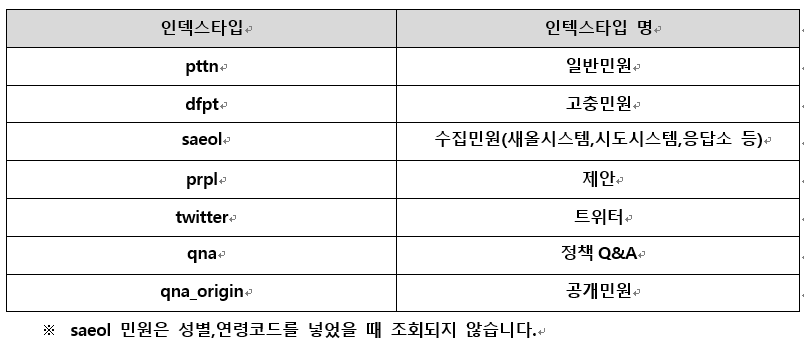

## 9. 민원발생 기관 순위
시작일자, 종료일자를 조건으로 민원 건 수가 많은 기관을 순위별로 조회할 수 있는 정보

기관: 국토교통부, 경찰청, 고용노동부, 한국토지주택공사

## 10. 민원발생 지역 순위
시작일자, 종료일자를 조건으로 민원 건 수가 많은 지역을 순위별로 조회할 수 있는 정보

지역: 경기도, 서울특별시, 인천광역시 등 시도 단위임